In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#Data Preprocessing

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.info()
#https://www.kaggle.com/c/bank-marketing-uci 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
df.describe ()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#EDA

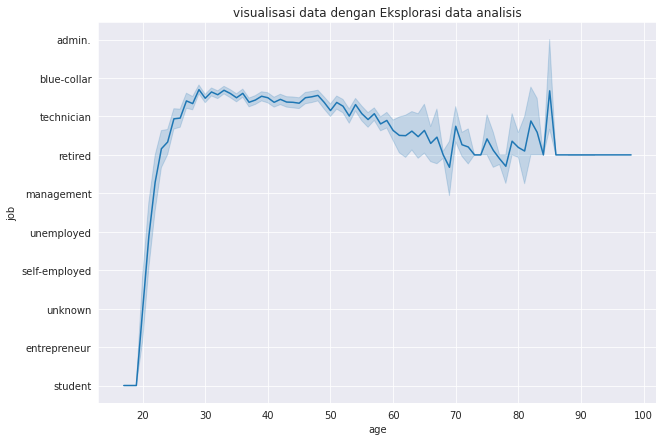

In [11]:
fig = plt.figure(figsize=(10, 7))
fig = sns.lineplot(x="age",  y ="job", data =df).set_title("visualisasi data dengan Eksplorasi data analisis")


no     36548
yes     4640
Name: y, dtype: int64


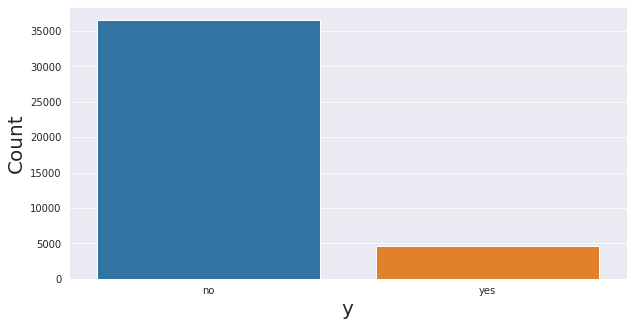

In [12]:
''' value count of y column '''
print(df.y.value_counts())

''' count plot '''
plt.figure(figsize=(10, 5))
sns.countplot(df['y']);
plt.xlabel('y', fontsize=20)
plt.ylabel('Count', fontsize=20);

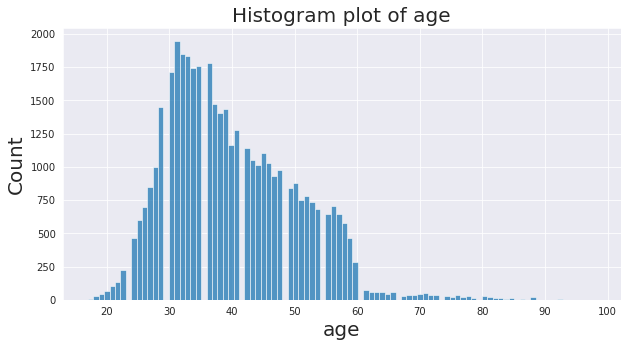

In [13]:
''' histogram plot of age '''
plt.figure(figsize=(10, 5))
sns.histplot(df.age);
plt.xlabel('age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram plot of age', fontsize=20);

In [14]:
''' dropping y column from data '''
df_new = df.drop(['y'], axis=1)

In [15]:
''' there are object features(categorical features) , lets chang them to dummies '''
df_new = pd.get_dummies(df_new)
df_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [16]:
''' checking shape '''
df_new.shape

(41188, 63)

In [17]:
df.cov()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,108.602451,-2.339147,0.132603,-66.945400,0.125661,-0.006069,0.005168,6.239801,0.194622,-13.346160
duration,-2.339147,67225.728877,-51.494888,-2305.683015,2.648520,-11.391802,0.797272,-9.807412,-14.793831,-837.439866
campaign,0.132603,-51.494888,7.672975,27.224921,-0.108494,0.656017,0.204971,-0.176061,0.649236,28.838822
pdays,-66.945400,-2305.683015,27.224921,34935.687284,-54.346448,79.574823,8.535132,-79.016677,96.250874,5031.877477
previous,0.125661,2.648520,-0.108494,-54.346448,0.244927,-0.326918,-0.058190,-0.116670,-0.390128,-17.926342
emp.var.rate,-0.006069,-11.391802,0.656017,79.574823,-0.326918,2.467915,0.705038,1.425360,2.649121,102.944953
cons.price.idx,0.005168,0.797272,0.204971,8.535132,-0.058190,0.705038,0.335056,0.158023,0.690961,21.832546
cons.conf.idx,6.239801,-9.807412,-0.176061,-79.016677,-0.116670,1.425360,0.158023,21.420215,2.229089,33.611125
euribor3m,0.194622,-14.793831,0.649236,96.250874,-0.390128,2.649121,0.690961,2.229089,3.008308,118.443421
nr.employed,-13.346160,-837.439866,28.838822,5031.877477,-17.926342,102.944953,21.832546,33.611125,118.443421,5220.283250


In [18]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


#Modelling


In [19]:
#normalisasi data
''' scaling '''
sc = StandardScaler()
df_scaled = sc.fit_transform(df_new)

In [20]:
df_scaled

array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.3392905 ,
         0.39770593, -0.1857    ],
       [ 3.26029527, -0.07438021,  0.15610492, ...,  2.94732687,
        -2.51442063, -0.1857    ]])

In [21]:
''' KMeans clustering '''

''' taking only 2 clusters '''
knn = KMeans(n_clusters=2)

''' fit on data '''
knn_ = knn.fit_predict(df_scaled)

In [22]:
df['cluster'] = knn_

''' cluster and y column from df '''
df[['cluster', 'y']]

,cluster,y
0,0,no
1,0,no
2,0,no
3,0,no
4,0,no
...,...,...
41183,1,yes
41184,1,no
41185,1,no
41186,1,yes


In [23]:
''' Periksa apakah y adalah cluster_label atau tidak!'''
pred = knn_
y_test = df['y']
y_test1, y_test2 = [], []
for i in y_test:
    if i == 'yes':
        y_test1.append(1)
        y_test2.append(0)
    else:
        y_test1.append(0)
        y_test2.append(1)
    
''' accuracy score '''
acc_1 = accuracy_score(y_test1 , pred)
acc_2 = accuracy_score(y_test2 , pred)
print('jika menganggap 1 dalam kolom cluster_label sebagai yes maka akurasi kolom ini menjadi kolom y akan menjadi %f, jika tidak maka akurasinya adalah %f'%(acc_1,acc_2))

jika menganggap 1 dalam kolom cluster_label sebagai yes maka akurasi kolom ini menjadi kolom y akan menjadi 0.703312, jika tidak maka akurasinya adalah 0.296688


In [24]:
#MEMBUAT RANDOM SKLEARN DENGAN VISUALISASI
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

Text(0.5, 1.0, 'Blobs')

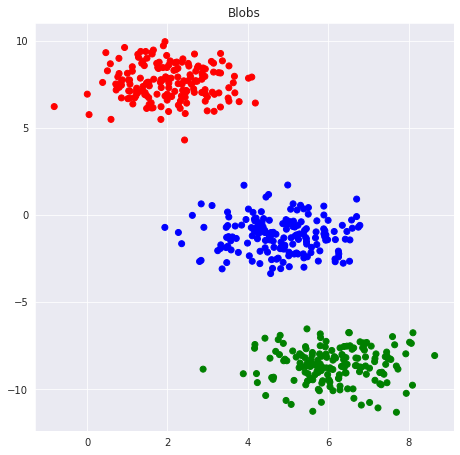

In [25]:
f, ax = plt.subplots(figsize=(7.5,7.5))
rgb = np.array(['r','g','b'])
ax.scatter(blobs[:,0], blobs[:,1], color=rgb[classes])
ax.set_title("Blobs")

In [26]:
#mendefinisikan 3 titik tengah kluster
from sklearn.cluster import KMeans
kmean= KMeans(n_clusters=3)
kmean.fit(blobs)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, random_state=None, tol=0.0001, verbose=0)
kmean.cluster_centers_

array([[ 2.01796756,  7.64727545],
       [ 6.14046835, -8.60670137],
       [ 4.80423278, -1.16329231]])

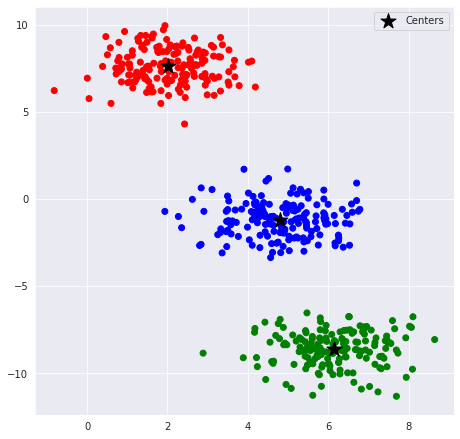

In [27]:
#visualisasikan kembali
f, ax = plt.subplots(figsize=(7.5,7.5))
ax.scatter(blobs[:,0], blobs[:,1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='*',
           s=250,color='black',label='Centers')


ax.legend(loc='best')

In [28]:
#memeriksa kmeans label dan class
kmean.labels_[:5]

array([2, 2, 0, 2, 1], dtype=int32)

In [29]:
classes[:5]

array([2, 2, 0, 2, 1])

In [30]:
#mengunakan Transform untuk mengubah output menjadi jarak dengan centroid
kmean.transform(blobs)[:5]

array([[10.60873572,  6.26074735,  1.3921864 ],
       [ 9.22591313,  7.55083016,  0.27509716],
       [ 0.93475241, 17.23479661,  9.67599341],
       [ 7.16754396,  9.65813432,  2.4199656 ],
       [18.20750684,  1.44388898,  8.99125346]])

In [31]:
!pip install metrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.7/841.7 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17814 sha256=8449752d0826fa33f9e0d3ccea183c26aaf5f189ef516b4f0d81a984fb0e7bbf
  Stored in directory: /root/.cache/pip/wheels/4f/55/f5/ca7e08a3ac083b918070e9d148ecafba8172b24611712ad678
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24234 sha256=57f7e0160836471aa4f12bd69334c8a80ed819f38faa8532ad2b0fbbc2794218
  Stored in directory: /root/.cache/pip/wheels/7c/bb/0d/525cedbe683d79ee6c9185fb7e3c27d30a43141ecf89ccb46b
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's depen

In [32]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs,kmean.labels_)
np.column_stack((classes[:5], silhouette_samples[:5]))

array([[2.        , 0.71790753],
       [2.        , 0.82884265],
       [0.        , 0.84875608],
       [2.        , 0.63105065],
       [1.        , 0.79533116]])

In [33]:
#memeriksa rata-rata skor silhouette
silhouette_samples.mean()

0.7799402011569104

In [34]:
metrics.silhouette_score(blobs,kmean.labels_)

0.7799402011569104

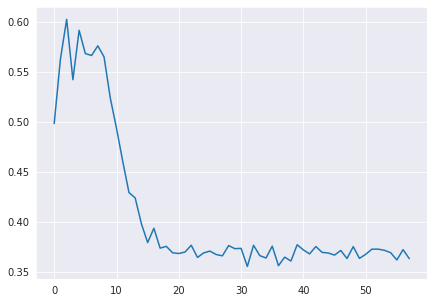

In [35]:
#Visualisasikan plot berikut untuk mendapatkan angka terbaik pada klustering
blobs, classes = make_blobs(500, centers=10)
silhouette_avgs = []
for k in range(2,60):
  kmean = KMeans(n_clusters=k).fit(blobs)
  silhouette_avgs.append(metrics.silhouette_score(blobs, kmean.labels_))

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(silhouette_avgs)


In [36]:
a = df.corr()

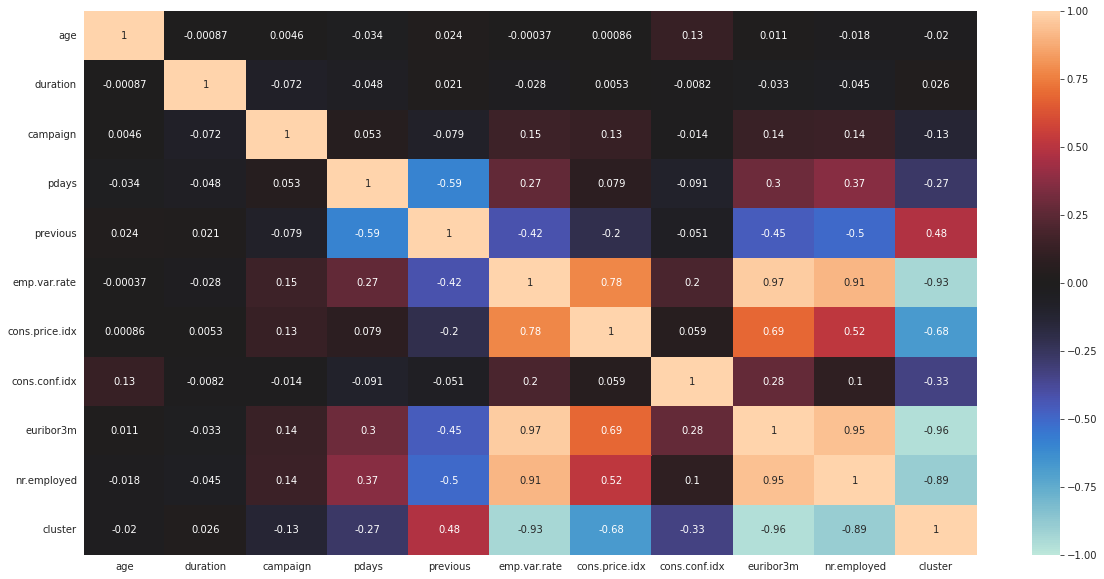

In [37]:
plt.figure(figsize=(20,10))
sb.heatmap(a,vmin=-1,vmax=1,center=0,annot=True)

Skewness:  0.7846968157646645
Kurtosis:  0.7913115311544336


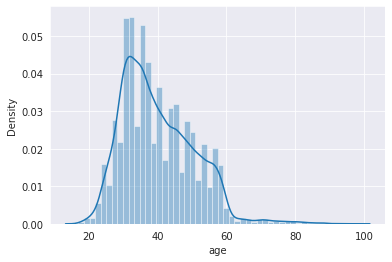

In [38]:
sb.distplot(df['age'])
print("Skewness: ", df['age'].skew())
print("Kurtosis: ", df['age'].kurt())

Skewness:  0.7846968157646645
Kurtosis:  0.7913115311544336


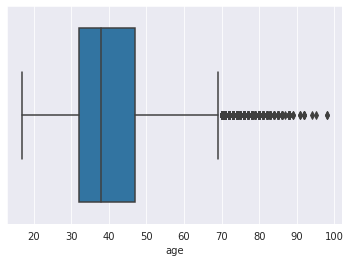

In [39]:
sb.boxplot(df['age'])
print("Skewness: ", df['age'].skew())
print("Kurtosis: ", df['age'].kurt())

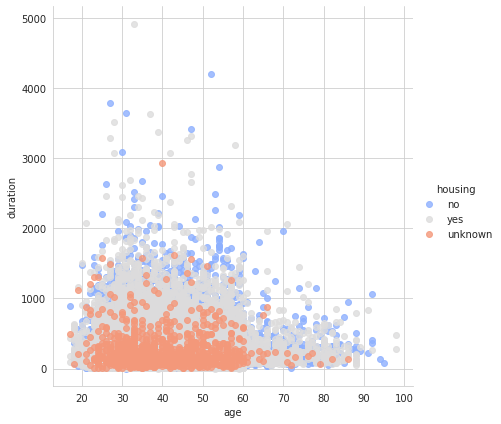

In [40]:
sns.set_style('whitegrid')
sns.lmplot('age','duration',data=df, hue='housing',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)